In [3]:
import pandas as pd
import numpy as np

csv = pd.read_csv('auto-mpg.csv')
csv

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [14]:
import scipy.stats as st
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
csv['horsepower'] = pd.to_numeric(csv['horsepower'], errors='coerce').fillna(0)
csv['mpg'] = pd.to_numeric(csv['mpg'], errors='coerce').fillna(0)

X = csv['horsepower'].values.reshape(-1, 1)
Y = csv['mpg'].values
LR.fit(X, Y)

coef= LR.coef_[0]
intercept = LR.intercept_


print(f"Coefficient (slope): {round(coef, 2)}")
print(f"Intercept: {round(intercept, 2)}")
print(f"Linear Equation: y = {round(coef, 2)}x + {round(intercept, 2)}\n")

r_sq = LR.score(X, Y)
correlation_coefficient = csv['horsepower'].corr(csv['mpg'])

print(f"Correlation Coefficient: {round(correlation_coefficient, 2)}")
print(f"Coefficient of determination (R\u00b2): {round(r_sq, 2)}\n")





Coefficient (slope): -0.15
Intercept: 38.58
Linear Equation: y = -0.15x + 38.58

Correlation Coefficient: -0.75
Coefficient of determination (R²): 0.57



There is a relationship between predictor and response. Our R^2 value tell us that around 57% of the variation in mpg  can be explained by horsepower. The Correlation Coefficient suggests that there is a strong negative corellation between horsepower and mpg. The relationship is negative (negative slope) and according to this model horsepower of 98 would be associated with a mpg of approximately 24.23. 

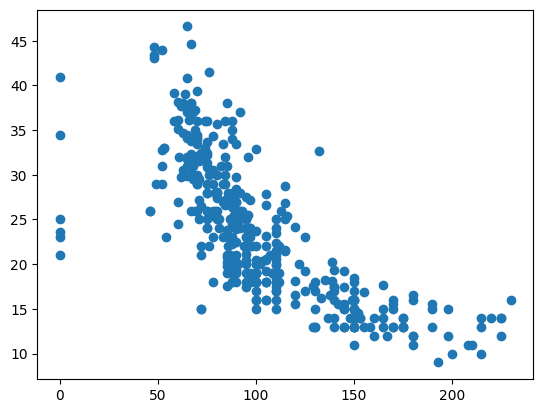

In [17]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'o')


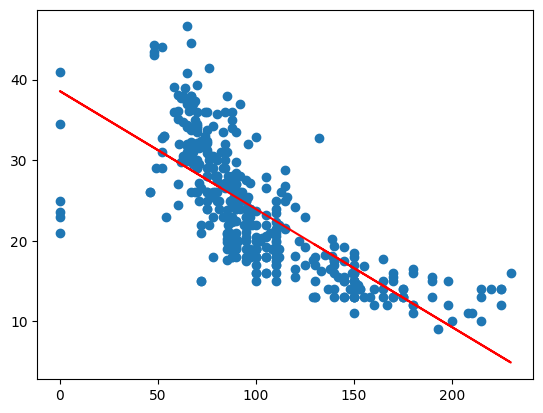

In [28]:
plt.plot(X, Y, 'o')
plt.plot(X, coef*X+intercept, color = "red")

There seem to be some issues with this fit. The distrubution of our observations does not look linear - it looks curvy. Our regression line does not do a good job at estimating values in the lower or upper end of the curve, though it does get the general inverse relationship between mpg and horsepower correct.